# Wavelet transforms:

### Example 1:

Let's carry out a DWT of this signal:

$f(n) = (2, 4, 6, 8, 9, -2, 3, -4)$ 

Then, carry out an inverse DWT to recover the signal.

In [1]:
import pywt

# https://pywavelets.readthedocs.io/en/latest/

In [2]:
# signal:

f = [2, 4, 6, 8, 9, -2, 3, -4]

In [3]:
# DWT:

cA, cD = pywt.dwt(f, 'haar')

In [4]:
print(cA) # approximation coef.
print(cD) # detail coef.

[ 4.24264069  9.89949494  4.94974747 -0.70710678]
[-1.41421356 -1.41421356  7.77817459  4.94974747]


In [5]:
# iDWT

f_recovered = pywt.idwt(cA, cD, 'haar')

In [6]:
print(f)
print(f_recovered)

[2, 4, 6, 8, 9, -2, 3, -4]
[ 2.  4.  6.  8.  9. -2.  3. -4.]


### Wavelet transform analysis:

coeffs = pywt.wavedec(x, 'wavelet', mode ='sym', level = n)

y = pywt.waverec(coeffs, 'wavelet', mode ='sym')

In [7]:
coeffs = pywt.wavedec(f, 'db1', level = 2, mode = 'periodic')

cA2, cD2, cD1 = coeffs

print(cA2)
print(cD2)
print(cD1)

[10.  3.]
[-4.  4.]
[-1.41421356 -1.41421356  7.77817459  4.94974747]


In [8]:
f_recovered2 = pywt.waverec(coeffs, 'db1', mode = 'periodic')

In [9]:
print(f)
print(f_recovered2)

[2, 4, 6, 8, 9, -2, 3, -4]
[ 2.  4.  6.  8.  9. -2.  3. -4.]


### Example 2: Audio file

Download a .wav file.

Decompose the signal in low and high frequencies by using DWT.

Then write the following files:

1. The fully reconstructed signal from the approximation and detail coefficients.


2. The low-frequency signal considering the approximation coefficients only.


3. The high-frequency signal considering the detail coefficients only.


4. Listen to all three audio tracks and compare them to the original one. What do you find?

In [10]:
from scipy.io import wavfile

import matplotlib.pyplot as plt
import numpy as np

import IPython.display as ipd

### Read wav file:

In [11]:
samplerate, data = wavfile.read("ImperialMarch60.wav")

In [12]:
ipd.Audio('./ImperialMarch60.wav')

### Define x and y axes:

In [13]:
t = np.arange(len(data))/float(samplerate)

data = data/max(data)

### Plot signal:

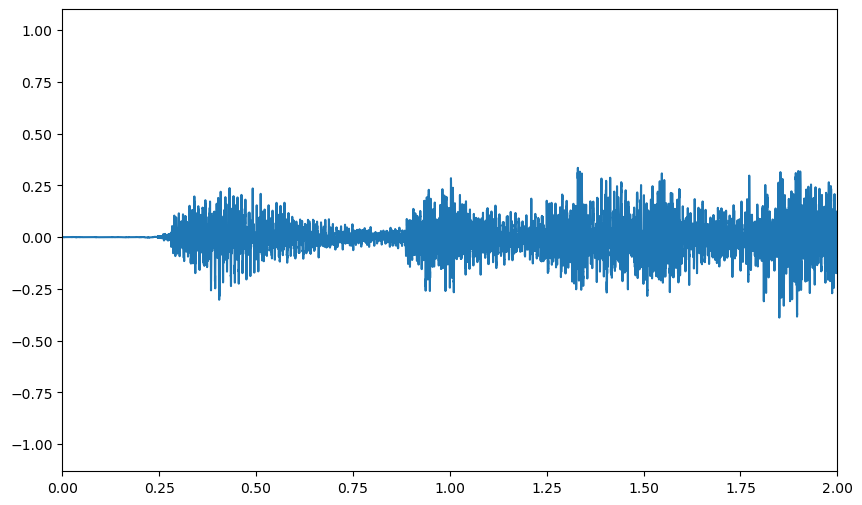

In [31]:
plt.figure(figsize=(10,6))

plt.plot(t, data)
plt.xlim(0,2)
plt.show()

### DWT to get coefficients:

In [30]:
cA, cD, = pywt.dwt(data, 'bior6.8', 'per')

print(cA.shape, cD.shape, data.shape)

(661500,) (661500,) (1323000,)


In [16]:
data_reconstruted = pywt.idwt(cA, cD, 'bior6.8', 'per')


wavfile.write('reconstructed.wav', samplerate, data_reconstruted)
wavfile.write('with_only_cas.wav', samplerate, cA) #low freq.
wavfile.write('with_only_cds.wav', samplerate, cD) #high freq.


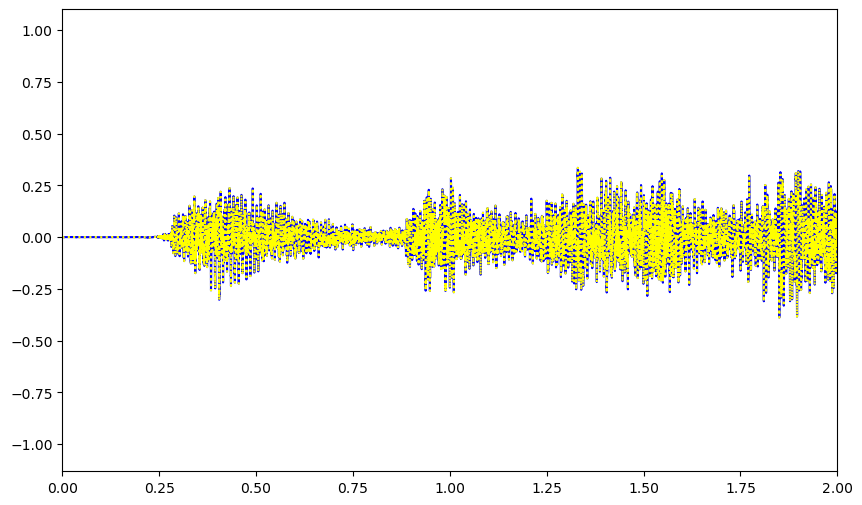

In [32]:
plt.figure(figsize=(10,6))

plt.plot(t, data, "blue")
plt.plot(t, data_reconstruted, linestyle = ":", c="yellow")
plt.xlim(0,2)
plt.show()